### 📓 Sales Project Analysis: Supply Chain, Financial & Sales Insights

 Import Libraries & Load Data
📌 Objective:
 Import essential libraries and load the cleaned sales dataset to begin the analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("cleaned_sales_project.csv")

# Preview the dataset
df.head()


,Date,Title,Category,Supplier,Sales Quantity,Original Price,Discount %,Final Price,Unit Cost,Revenue,Profit,Lead Time (days),Stock Level
0,2025-04-05 02:10:24,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,Supplier A,45,NaN,0.0,NaN,110.755556,4984,2146,18,131
1,2025-04-05 02:10:24,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,Supplier A,36,NaN,0.0,NaN,112.361111,4045,1741,18,97
2,2025-04-05 02:10:24,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,Supplier A,38,NaN,0.0,NaN,112.736842,4284,1844,18,97
3,2025-04-05 02:10:24,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,Supplier A,36,NaN,0.0,NaN,111.361111,4009,1726,18,197
4,2025-04-05 02:10:24,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,Supplier A,50,NaN,0.0,NaN,112.040000,5602,2411,18,58


 Initial Data Overview
📌 Objective:
Understand the structure and quality of the dataset.
We'll inspect:

Column names & data types

Missing values

Descriptive statistics

In [2]:
# Dataset structure
df.info()

# Summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7300 non-null   object 
 1   Title             7300 non-null   object 
 2   Category          7300 non-null   object 
 3   Supplier          7300 non-null   object 
 4   Sales Quantity    7300 non-null   int64  
 5   Original Price    2555 non-null   float64
 6   Discount %        7300 non-null   float64
 7   Final Price       2555 non-null   float64
 8   Unit Cost         7300 non-null   float64
 9   Revenue           7300 non-null   int64  
 10  Profit            7300 non-null   int64  
 11  Lead Time (days)  7300 non-null   int64  
 12  Stock Level       7300 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 741.5+ KB


Date                   0
Title                  0
Category               0
Supplier               0
Sales Quantity         0
Original Price      4745
Discount %             0
Final Price         4745
Unit Cost              0
Revenue                0
Profit                 0
Lead Time (days)       0
Stock Level            0
dtype: int64

📦 Supply Chain Analytics


📌 Objective:
Evaluate supplier reliability based on:

Lead Time Consistency: Low standard deviation of lead time indicates better reliability.

Stock Availability: Average, minimum, and maximum stock levels per supplier.

Sales Impact: Total sales quantity delivered by each supplier.

This helps identify high-performing suppliers and those that may cause stockouts or delays.

In [3]:
# Group by supplier and calculate performance metrics
supplier_analysis = df.groupby("Supplier").agg({
    "Lead Time (days)": ["mean", "std", "min", "max"],
    "Stock Level": ["mean", "min", "max"],
    "Sales Quantity": "sum"
})

# Flatten multi-index columns
supplier_analysis.columns = ['_'.join(col).strip() for col in supplier_analysis.columns.values]
supplier_analysis = supplier_analysis.reset_index()

# Sort by lead time variability to identify inconsistent suppliers
supplier_analysis.sort_values(by="Lead Time (days)_std", ascending=False).head(10)


,Supplier,Lead Time (days)_mean,Lead Time (days)_std,Lead Time (days)_min,Lead Time (days)_max,Stock Level_mean,Stock Level_min,Stock Level_max,Sales Quantity_sum
0,Supplier A,18.500000,9.016967,4,27,105.052055,10,199,70726
1,Supplier B,16.500000,7.142652,7,29,104.155137,10,199,166724
2,Supplier C,18.400000,7.004776,8,27,105.042740,10,199,64720
3,Supplier D,17.333333,2.495578,14,20,104.828311,10,199,52124


 Lead Time Impact on Sales
📌 Objective:
Analyze if there's a relationship between lead time and sales quantity.
We compute the correlation to determine if longer lead times negatively impact sales.

In [4]:
# Compute correlation between lead time and sales quantity
df[["Lead Time (days)", "Sales Quantity"]].corr()


,Lead Time (days),Sales Quantity
Lead Time (days),1.000000,-0.037137
Sales Quantity,-0.037137,1.000000


: Inventory Optimization
📌 Objective:
Determine optimal inventory levels to minimize stockouts and overstocking using:

Average stock levels

Reorder points based on sales trends and lead time

Explore opportunities to improve stock efficiency per product

This helps ensure a balanced inventory that supports sales without excessive holding costs.

In [5]:
# Calculate average daily sales per product
daily_sales = df.groupby("Title").agg({
    "Sales Quantity": "sum",
    "Date": "nunique",  # assuming each record is daily
    "Lead Time (days)": "mean",
    "Stock Level": "mean"
})

# Rename columns for clarity
daily_sales.rename(columns={
    "Sales Quantity": "Total Sales",
    "Date": "Active Days",
    "Lead Time (days)": "Avg Lead Time",
    "Stock Level": "Avg Stock Level"
}, inplace=True)

# Estimate average daily demand
daily_sales["Avg Daily Sales"] = daily_sales["Total Sales"] / daily_sales["Active Days"]

# Estimate reorder point: (Avg Daily Sales × Avg Lead Time)
daily_sales["Estimated Reorder Point"] = daily_sales["Avg Daily Sales"] * daily_sales["Avg Lead Time"]

# Compare reorder point vs. average stock level
daily_sales[["Avg Stock Level", "Estimated Reorder Point"]].head(10)


,Avg Stock Level,Estimated Reorder Point
Title,,
Acer SB220Q bi 21.5 inches Full HD (1920 x 1080) IPS Ultra-Thin,104.397260,49176.0
BIYLACLESEN Women's 3-in-1 Snowboard Jacket Winter Coats,107.186301,489348.0
DANVOUY Womens T Shirt Casual Cotton Short,106.487671,458300.0
"Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops",106.824658,394506.0
John Hardy Women's Legends Naga Gold & Silver Dragon Station Chain Bracelet,105.457534,415170.0
Lock and Love Women's Removable Hooded Faux Leather Moto Biker Jacket,106.145205,562900.0
MBJ Women's Solid Short Sleeve Boat Neck V,107.967123,245154.0
Mens Casual Premium Slim Fit T-Shirts,102.498630,490941.0
Mens Casual Slim Fit,103.419178,221540.0


Visualize Stockout Risk
📌 Objective:
Identify and visualize products where:

🔻 Avg Stock Level < Estimated Reorder Point

These products may frequently run out of stock and negatively affect sales.
We'll plot the top 10 most at-risk products.

C:\Users\Sikha\AppData\Local\Temp\ipykernel_10616\211101820.py:15: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from current font.
  plt.tight_layout()
C:\Users\Sikha\AppData\Local\Temp\ipykernel_10616\211101820.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\Sikha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


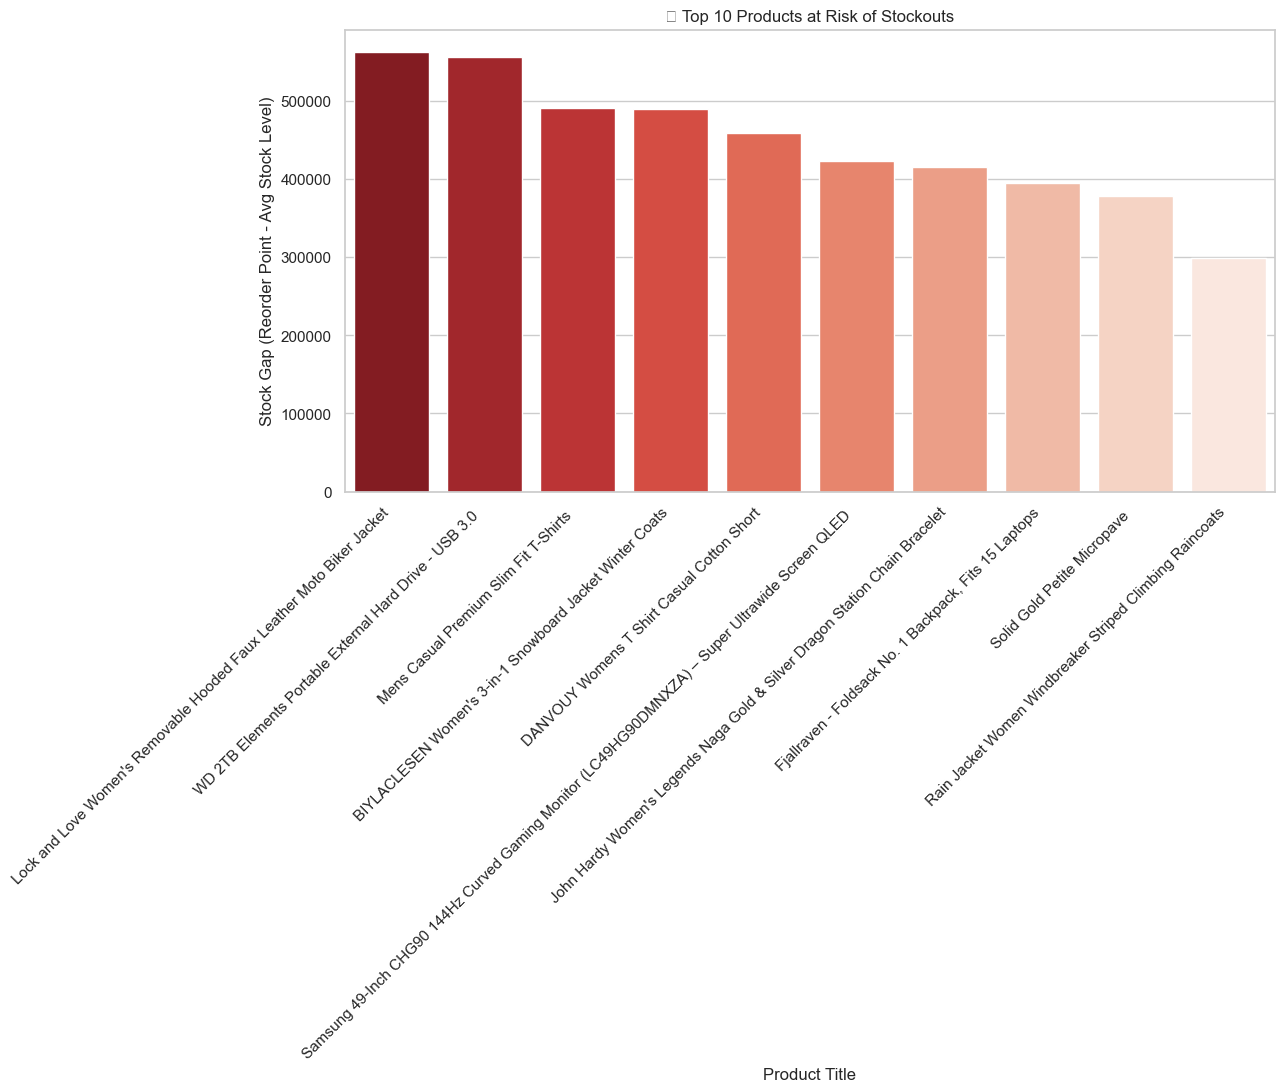

In [6]:
# Filter products where average stock level is below reorder point
at_risk_products = daily_sales[daily_sales["Avg Stock Level"] < daily_sales["Estimated Reorder Point"]]

# Sort by highest reorder gap
at_risk_products["Stock Gap"] = at_risk_products["Estimated Reorder Point"] - at_risk_products["Avg Stock Level"]
top_at_risk = at_risk_products.sort_values(by="Stock Gap", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_at_risk, x=top_at_risk.index, y="Stock Gap", palette="Reds_r")
plt.xticks(rotation=45, ha="right")
plt.title("🔻 Top 10 Products at Risk of Stockouts")
plt.ylabel("Stock Gap (Reorder Point - Avg Stock Level)")
plt.xlabel("Product Title")
plt.tight_layout()
plt.show()


 Lead Time Analysis
📌 Objective:
Analyze historical lead times to:

Spot suppliers or products with high variability (inconsistency).

Identify potential bottlenecks or delays.

Help optimize reorder decisions and supplier selection.

C:\Users\Sikha\AppData\Local\Temp\ipykernel_10616\2877979209.py:7: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  plt.tight_layout()
C:\Users\Sikha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


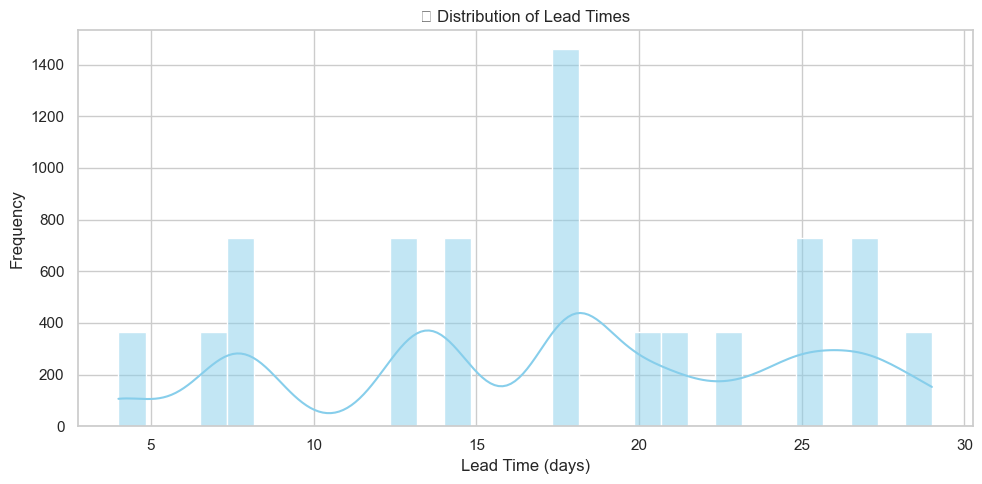

In [7]:
# Lead time distribution overview
plt.figure(figsize=(10, 5))
sns.histplot(df["Lead Time (days)"], bins=30, kde=True, color='skyblue')
plt.title("⏱ Distribution of Lead Times")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Financial Analysis


Profit Margin Analysis
📌 Objective:
Evaluate product profitability using:

Unit Cost

Original Price

Final Price (after discount)

Calculate:

Profit per unit

Profit margin %

This will help determine which products are the most and least profitable.

In [8]:
# Calculate profit per unit and profit margin
df["Profit per Unit"] = df["Final Price"] - df["Unit Cost"]
df["Profit Margin (%)"] = (df["Profit per Unit"] / df["Final Price"]) * 100

# Check average margin by product
profit_analysis = df.groupby("Title")[["Profit per Unit", "Profit Margin (%)"]].mean().reset_index()
profit_analysis.sort_values(by="Profit Margin (%)", ascending=False).head(10)


,Title,Profit per Unit,Profit Margin (%)
4,John Hardy Women's Legends Naga Gold & Silver ...,-5.670164,-0.857921
15,Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...,-0.891908,-0.858067
17,WD 2TB Elements Portable External Hard Drive -...,-0.656958,-1.086076
16,Solid Gold Petite Micropave,-1.915923,-1.185690
0,Acer SB220Q bi 21.5 inches Full HD (1920 x 108...,-10.954839,-1.927456
14,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,-2.465652,-2.371272
1,BIYLACLESEN Women's 3-in-1 Snowboard Jacket Wi...,NaN,NaN
2,DANVOUY Womens T Shirt Casual Cotton Short,NaN,NaN
3,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",NaN,NaN
5,Lock and Love Women's Removable Hooded Faux Le...,NaN,NaN


Visualize Top Profitable Products
📌 Objective:
Highlight the top 10 products with the highest average profit margin.

C:\Users\Sikha\AppData\Local\Temp\ipykernel_10616\2131819064.py:10: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Sikha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


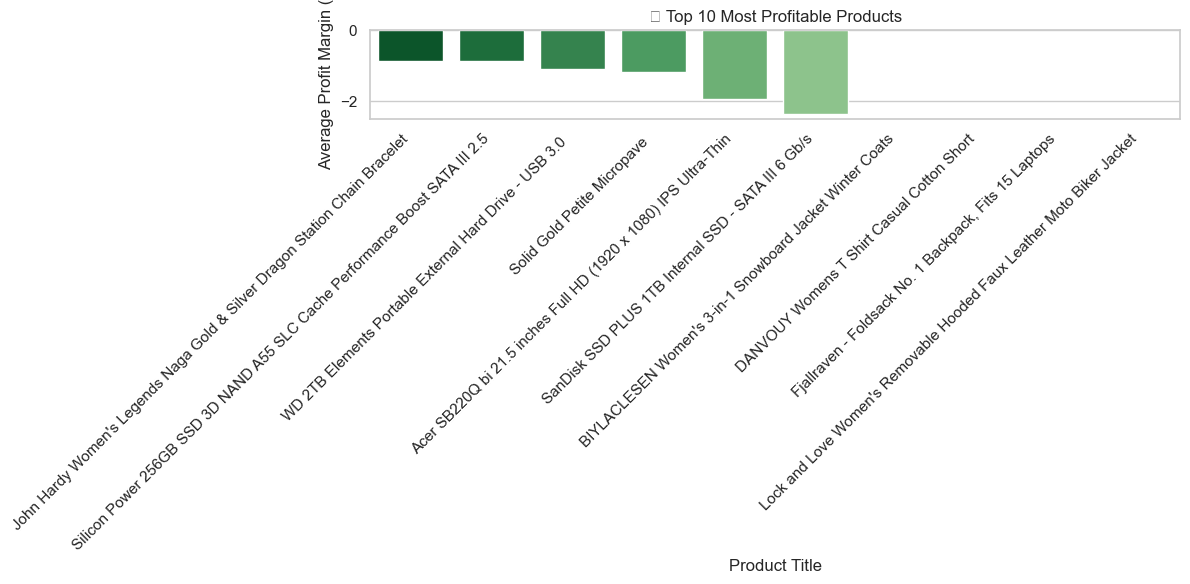

In [9]:
# Visualize top 10 products with highest profit margins
top_profit = profit_analysis.sort_values(by="Profit Margin (%)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit, x="Title", y="Profit Margin (%)", palette="Greens_r")
plt.title("💹 Top 10 Most Profitable Products")
plt.ylabel("Average Profit Margin (%)")
plt.xlabel("Product Title")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
